<a href="https://colab.research.google.com/github/elizleon/mineriaDatos/blob/main/Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import LabelEncoder
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB

pd_weather = pd.read_csv('weather_nominal.csv')
pd_weather

In [ ]:
X = pd_weather.values
X

In [ ]:
Y = pd_weather['play']
Y

In [ ]:
le = preprocessing.LabelEncoder()

outlook_encoded=le.fit_transform(pd_weather['outlook'])
temperature_encoded = le.fit_transform(pd_weather['temperature'])
humidity_encoded = le.fit_transform(pd_weather['humidity'])
windy_encoded = le.fit_transform(pd_weather['windy'])
label = le.fit_transform(pd_weather['play'])

# Combining all dimensions of the dataset
features = list(zip(outlook_encoded, temperature_encoded, humidity_encoded, windy_encoded))
print(features)


In [22]:
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(features, label,
                                                    test_size=.3)
print("Tamaño de entrenamiento",len(X_train_weather))
print("Tamaño de prueba" ,len(y_test_weather))

Tamaño de entrenamiento 9
Tamaño de prueba 5


In [ ]:
X_train_weather

In [ ]:
y_train_weather

Se utiliza la función fit para entrenar en modelo con los datos de entrenamiento

In [25]:
model = CategoricalNB()
model.fit(X_train_weather, y_train_weather)

CategoricalNB()

Por medio de la función `predict`, se predicen los labels para el conjunto de prueba. Estos resultados pueden variar debido a que, cada vez que se realiza la división de los datos entre entrenamiento y prueba, esto se hace de forma aleatoria y genera que la división entre entrenamiento y test cambie cada vez que ejecuta la función `train_test_split`. Para este caso, los labels predichos y reales se encuentran a continuación:

In [26]:
y_pred_weather = model.predict(X_test_weather)
print("Labels predichos por el modelo:", y_pred_weather)
print("Labels reales:", y_test_weather)

Labels predichos por el modelo: [0 1 1 1 1]
Labels reales: [0 1 0 1 0]


desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report, plot_roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Clase Verdadera',
           xlabel='Clase Predicción')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax

Se imprime la matriz de Confusión


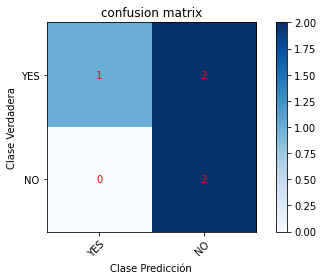

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[1 2]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [33]:
np.set_printoptions(precision=2)
y_test_weather = list(map(int, y_test_weather))
y_pred_weather = list(map(int, y_pred_weather))

class_names = ['YES', 'NO']
cm = confusion_matrix(y_test_weather, y_pred_weather)

plot_confusion_matrix(y_test_weather, y_pred_weather, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_weather, y_pred_weather, digits=2))

Para este caso, donde los ejemplos de prueba son 5, el modelo se equivocó dos veces (valor superior derecho y valor inferior izquierdo de la matriz). Así mismo, acertó 3 veces. Por esto, los valores de precision, recall y f1-score son más altos para la clase 1 (NO)